In [26]:
import pandas as pd
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import binom
import warnings
import itertools

## Item 8.18
List all samples of size $n=2$ that are possible (with replacement) from the population in Problem 8.17. Use the chart wizard of EXCEL to plot the sampling distribution of the mean to show that 
$$
\mu_{\overline{x}} = \mu
$$

, and show that 
$$
\sigma^2_{\overline{x}} = \sigma^2/2
$$

### Given

<center>
From item 8.17, we'll have:
</center>

$$
\left\{ (9, \frac{1}{3}), (12, \frac{1}{3}), (15, \frac{1}{3}) \right\}
$$

<center>
Where each item follows the form \( (x, P(x)) \)
</center>


### Mean and Variance of the population

We'll use the following formula to calculate for the mean of the population:
$$
\mu = \sum x \cdot P(x)
$$

Therefore we'll have,

$$
\begin{align*}
\mu &= (9 \times \frac{1}{3}) +  (12 \times \frac{1}{3}) +  (15 \times \frac{1}{3}) \\
\mu &= \frac{9}{3} + \frac{12}{3} + \frac{15}{3} \\
\mu &= \frac{36}{3} \\
\mu &= 12
\end{align*}
$$

As for the variance, we could use the following formula:
$$
\begin{align*}
\sigma^2 &= \sum x^2 \cdot P(x) - \mu^2 \\
\sigma^2 &= [(\frac{81/3}) + (\frac{144}{3}) + (\frac{225}{3})] - 144 \\
\sigma^2 &= [\frac{450}{3}] - 144 \\
\sigma^2 &= 150 - 144 \\
\sigma^2 &= 6
\end{align*}
$$

### Sampling Distribution and Proving that $\mu_{\overline{x}} = \mu$

We'll first use the python package 'itertools' to get the different samples with n=2. 

In [3]:
credit_hours = [9,12,15]
combs = list(itertools.product(credit_hours, credit_hours))
a = [x[0] for x in combs]
b = [x[1] for x in combs]
data = {
    'A' : a, 
    'B' : b
}
df = pd.DataFrame(data)
df

,A,B
0,9,9
1,9,12
2,9,15
3,12,9
4,12,12
5,12,15
6,15,9
7,15,12
8,15,15


Then we'll create a new column for the mean for each sample:

In [4]:
df['Mean'] = (df['A'] + df['B']) / 2
df

,A,B,Mean
0,9,9,9.0
1,9,12,10.5
2,9,15,12.0
3,12,9,10.5
4,12,12,12.0
5,12,15,13.5
6,15,9,12.0
7,15,12,13.5
8,15,15,15.0


$\overline{x}$ in this context is the unique mean value from our samples. 

In [5]:
unique_values = df['Mean'].unique()
df['x_bar'] = pd.Series(unique_values)
df

,A,B,Mean,x_bar
0,9,9,9.0,9.0
1,9,12,10.5,10.5
2,9,15,12.0,12.0
3,12,9,10.5,13.5
4,12,12,12.0,15.0
5,12,15,13.5,NaN
6,15,9,12.0,NaN
7,15,12,13.5,NaN
8,15,15,15.0,NaN


Now to calculate the probability for each $\overline{x}$, we'll use the following formula:

$$
P(\overline{x}) = \frac{\text{Number of occurence from 'Mean' column}}{\text{Total number of sample space}}
$$

In [6]:
count_occurence = df['Mean'].value_counts()
count_occurence_prob = count_occurence / count_occurence.sum()
df['p(x_bar)'] = df['x_bar'].map(count_occurence_prob)
df

,A,B,Mean,x_bar,p(x_bar)
0,9,9,9.0,9.0,0.111111
1,9,12,10.5,10.5,0.222222
2,9,15,12.0,12.0,0.333333
3,12,9,10.5,13.5,0.222222
4,12,12,12.0,15.0,0.111111
5,12,15,13.5,NaN,NaN
6,15,9,12.0,NaN,NaN
7,15,12,13.5,NaN,NaN
8,15,15,15.0,NaN,NaN


Now let us proceed to graph the probability distribution of our samples:

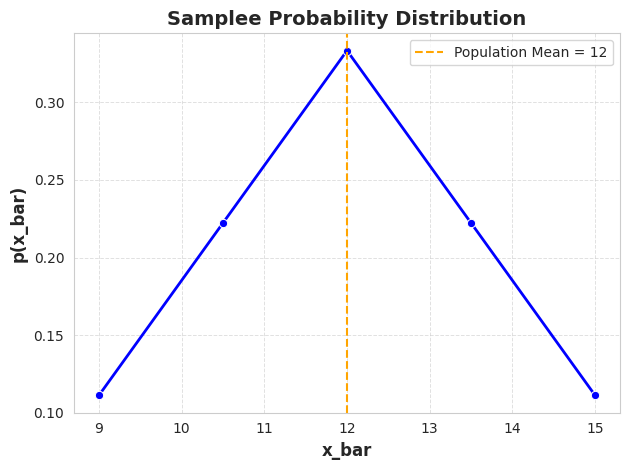

In [7]:
warnings.filterwarnings('ignore')
df_dist = df[['x_bar', 'p(x_bar)']].dropna()
sns.set_style("whitegrid")

sns.lineplot(x='x_bar', y='p(x_bar)', data=df_dist, marker='o', linewidth=2, color='blue')

plt.xlabel('x_bar', fontsize=12, fontweight='bold')
plt.ylabel('p(x_bar)', fontsize=12, fontweight='bold')
plt.title('Samplee Probability Distribution', fontsize=14, fontweight='bold')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.6)
plt.axvline(12, color='orange', linestyle='--', label=f'Population Mean = {12}')

plt.tight_layout()
plt.legend()
plt.show()

As you can see the population mean ($\mu=12$) is equals to the sample mean. We can confirm this by getting the mean of our sample space through python.

In [8]:
x_bar_mean = df['Mean'].mean()
x_bar_mean 

12.0

### Showing that $s^2 = \sigma^2/2$

To get the $s^2$ of a probability distribution, we could use the following formula

$$
s^2 = \sum (x-\mu)^2 \cdot P(x)
$$

In [9]:

df['(xbar-mu).p(xbar)'] = ((df['x_bar']-x_bar_mean)**2) * df['p(x_bar)']
df

,A,B,Mean,x_bar,p(x_bar),(xbar-mu).p(xbar)
0,9,9,9.0,9.0,0.111111,1.0
1,9,12,10.5,10.5,0.222222,0.5
2,9,15,12.0,12.0,0.333333,0.0
3,12,9,10.5,13.5,0.222222,0.5
4,12,12,12.0,15.0,0.111111,1.0
5,12,15,13.5,NaN,NaN,NaN
6,15,9,12.0,NaN,NaN,NaN
7,15,12,13.5,NaN,NaN,NaN
8,15,15,15.0,NaN,NaN,NaN


In [10]:
df['(xbar-mu).p(xbar)'].sum()

3.0

Remember the our **population variance ($\sigma^2$) is equals to 6**.

$$
\begin{align*}
s^2 &= \sigma^2/2 \\
3 &= \frac{6}{2}\\
3 &= 3
\end{align*}
$$

With all that, we have proven that it is **indeed the case that $\mu_{\overline{x}} = \mu$ and 
$s^2 = \sigma^2/2$**



---

## Item 8.21
A population consists of the four numbers 3, 7, 11, and 15. Consider all possible samples of size 2 that can be drawn with replacement from this population. Find:

<center>
(a) the population mean, <br>
(b) the population standard deviation,  <br>
(c) the mean of the sampling distribution of means, and  <br>
(d) the standard deviation of the sampling distribution of means.<br>
</center>
<br>
Verify parts (c) and (d) directly from (a) and (b) by using suitable formulas.


### Given    
<center>
\[
\left\{ 3, 7, 11, 15 \right\} \quad n = 2
\]
</center>

### The population mean:

$$
\begin{align*}
\mu &= \frac{\sum x}{N}\\
\mu &= \frac{3 + 7 + 11 + 15}{4} \\
\mu &= \frac{36}{4} \\
\mu &= 9
\end{align*}
$$

### The population standard deviation:
$$
\begin{align*}
\sigma &= \sqrt{\frac{\sum (x_i - \mu)^2}{N}}
\end{align*}
$$

In [11]:
population = [3,7,11,15]
population_mean = sum(population) / len(population)
population_std_upper = [(x-population_mean)**2 for x in population]
population_std = (sum(population_std_upper) / len(population))**0.5
population_std

4.47213595499958

$$
\sigma \approx 4.4721
$$

### Mean of sampling distribution of means:


In [12]:
combs = list(itertools.product(population, population))
a = [x[0] for x in combs]
b = [x[1] for x in combs]
data = {
    'A' : a, 
    'B' : b
}
df = pd.DataFrame(data)
df

,A,B
0,3,3
1,3,7
2,3,11
3,3,15
4,7,3
5,7,7
6,7,11
7,7,15
8,11,3
9,11,7


In [13]:
df['x_bar'] = (df['A'] + df['B']) / 2
df

,A,B,x_bar
0,3,3,3.0
1,3,7,5.0
2,3,11,7.0
3,3,15,9.0
4,7,3,5.0
5,7,7,7.0
6,7,11,9.0
7,7,15,11.0
8,11,3,7.0
9,11,7,9.0


In [14]:
sampling_mean = df['x_bar'].mean()
sampling_mean

9.0

Therefore, 

$$
\mu_{\overline{x}} = 9
$$

### Standard deviation of the sampling distribution of means

We could calculate this by:

$$
s = \sqrt{\frac{\sum (x-\mu_{\overline{x}})^2}{n-1}}
$$

In [15]:
df['squared_deviations'] = (df['x_bar'] - sampling_mean)**2
sample_variance = df['squared_deviations'].sum() / (len(df) -1)
sample_std = sample_variance**0.5
sample_std

3.265986323710904

$$
s \approx 3.266
$$


---

### Comparing the Statistics of Population and Samples:

#### For the mean
As we have attained from earlier calculations,
$$
\begin{align*}
\mu = 9 \\
\mu_{\overline{x}} = 9
\end{align*}
$$

Therefore, $\mu = \mu_{\overline{x}}$

#### For the mean
As we have attained from earlier calculations,
$$
\begin{align*}
\sigma &\approx 4.4721 \\
s  &\approx 3.2660
\end{align*}
$$

As we know, the **relationship between sample standard deviation and population standard deviation** is as follows:

$$
s = \frac{\sigma}{\sqrt{N_s}}
$$
where $N_s$ is the sample count ($N_s = 2$)
$$
\begin{align*}
3.266 &= \frac{4.721}{\sqrt{2}}
\end{align*}
$$

In [16]:
4.4721/(2)**0.5

3.1622522361443592

$$
3.266 \neq 3.1622
$$

But that's only because I use **Bessel Correction** in computation for $s$. This is due to the fact the usual **standard deviation formula is bias** and can give a more precise approximation if we use $N-1$ instead of $N$ in the denominator.

Nonetheless, if we want to get accurate measurement, let us apply the usual standard formula to the sample too:

In [17]:
df['squared_deviations'] = (df['x_bar'] - sampling_mean)**2
sample_variance = df['squared_deviations'].sum() / (len(df)) #I remove the -1
sample_std = sample_variance**0.5
sample_std

3.1622776601683795

Now that $s=3.1623$, the $s = \frac{\sigma}{\sqrt{N_s}}$ relationship is now true.

---

## Item 8.34)

Find the probability that of the next 200 children born, (a) less than 40% will be boys, (b) between 43% and
57% will be girls, and (c) more than 54% will be boys. Assume equal probabilities for the births of boys and
girls.

### Solution
Let us first calculate the mean of this probabilty distribution (binomial):
$$
\begin{align*}
\mu &= N \cdot p\\
\mu &= 200 \cdot 0.50 \\
\mu &= 100
\end{align*}
$$

For the standard deviation:
$$
\begin{align*}
\sigma &= \sqrt{N \cdot p \cdot q} \\
\sigma &= \sqrt{200 \cdot 0.50 \cdot 0.50} \\
\sigma &= \sqrt{200 \cdot 0.25} \\
\sigma &= \sqrt{50}
\end{align*}
$$

In [30]:
mean_prob = (200*0.25)**0.5

$$
\sigma \approx 7.0711
$$

Before anything, let's assume the distrubition is normal.

#### a) Probability the boys will be less than 40%
The 40% of 200 is 80. Thus we'll have to find $P(X < 80) = P(X \leq 79)$.

Let's calculate the probability using a function from scipy that calculates the EXACT probability for binomial distribution.

In [39]:
result = binom.cdf(79, 200, 0.5) * 100
print(f'P(X<=79) = {result:.2f}%')

P(X<=79) = 0.18%


#### b) between 43% and 57% will be girls,


In [40]:
print(200*0.43)
print(200*0.57)

86.0
113.99999999999999


$$
P(86 \leq X \leq 114) = P(X \leq 114) - P(X \leq 85)
$$

In [47]:
result = (binom.cdf(114, 200, 0.5) - binom.cdf(85, 200, 0.5)) * 100
print(f'P(86<=X<=114) = {result:.2f}%')

P(86<=X<=114) = 96.00%


### (c) more than 54% will be boys.

In [45]:
200*0.54

108.0

$$
P(X > 108) = 1 - P(X \leq 107)
$$

In [48]:
result = (1 - binom.cdf(107, 200, 0.5))*100
print(f'P(X>108) = {result:.2f}%')

P(X>108) = 14.44%


## 8.49)
The credit hour distribution at Metropolitan Technological College is as
follows:

| x    | 6   | 9   | 12  | 15  | 18  |
|------|-----|-----|-----|-----|-----|
| p(x) | 0.1 | 0.2 | 0.4 | 0.2 | 0.1 |

Find $\mu$ and $\sigma^2$ Give the 25 (with replacement) possible samples of size 2, their means, and their probabilities

---

### Calculating the mean and variance

For a probability distribution, we could calculate the mean by:

$$
\mu = \sum (x \times p(x))
$$

In [ ]:
x_given = [6,9,12,15,18]
p_x = [0.1,0.2,0.4,0.2,0.1]
x_p_x = [x_given[i]*p_x[i] for i in range(len(x_given))]
mean_prob = sum(x_p_x)
mean_prob

$$
\mu = 12
$$

For variance:

$$
\sigma^2 = \sum((x-\mu)^2 \times p(x))
$$

In [ ]:
var_prob = sum([((x_given[i] - mean_prob)**2)*p_x[i] for i in range(len(x_given))])
var_prob

In [ ]:
def sample_prob(x):
    match x:
        case 6:
            return 0.1
        case 9:
            return 0.2
        case 12:
            return 0.4
        case 15:
            return 0.2
        case 18:
            return 0.1
        case _:
            return ""
        
perm = list(itertools.product(x_given, x_given))
a = [x[0] for x in perm]
b = [x[1] for x in perm]
data = {
    'A' : a, 
    'B' : b
}
df = pd.DataFrame(data)
df['x_bar'] = (df['A'] + df['B']) / 2
df

Remember that our earlier mean computation
$$
\mu = 12
$$

Then let's calculate the mean of each our sample size to confirm its validity.

In [ ]:
sample_mean = df['x_bar'].mean()
sample_mean

As one can notice, $\mu = \mu_{\overline{x}}$.
